# tSNE Plots of Word Embeddings

In [1]:
import pickle
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "../data_processed/word_embeddings/"
OUTPUT_FOLDER = "tsne_plots/"

In [3]:
date_updated = '5_10'
models = {
    1: {
        "name": "Webhose & Google News - Both Sides - Updated {}".format(date_updated),
        "base_name": "wb_gn_{}_full".format(date_updated)
    },
    2: {
        "name": "Webhose & Google News - Liberal - Updated {}".format(date_updated),
        "base_name": "wb_gn_{}_liberal".format(date_updated)
    },
    3: {
        "name": "Webhose & Google News - Conservative - Updated {}".format(date_updated),
        "base_name": "wb_gn_{}_conservative".format(date_updated)
    },
    4: {
        "name": "All News - Both Sides",
        "base_name": "all_{}_full".format(date_updated)
    },
    5: {
        "name": "All News - Liberal",
        "base_name": "all_{}_liberal".format(date_updated)
    },
    6: {
        "name": "All News - Conservative",
        "base_name": "all_{}_conservative".format(date_updated)
    }
}

In [4]:
def load_data(filename):
    with open(filename, 'rb') as pickle_file:
        return pickle.load(pickle_file)

In [5]:
def reduce_with_tSNE(embeddings, reversed_dictionary, num_words=500):
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
    num_words = 500
    low_dim_embeds = tsne.fit_transform(embeddings[:num_words, :])
    labels = [reversed_dictionary[i] for i in range(num_words)]
    
    return low_dim_embeds, labels

In [6]:
def load_and_reduce_dim(base_name, num_words):
    input_filename = os.path.join(DATA_FOLDER, "{}_embedding_vocab.pickle".format(base_name))
    input_data = load_data(input_filename)
    embeddings = input_data["embeddings"]
    reversed_dictionary = input_data["reversed_dictionary"]
    
    return reduce_with_tSNE(embeddings, reversed_dictionary, num_words)

In [7]:
def plot_with_labels(low_dim_embeds, labels, filename):
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embeds[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.savefig(filename)
    plt.show()

Webhose & Google News - Both Sides - Updated 5_10


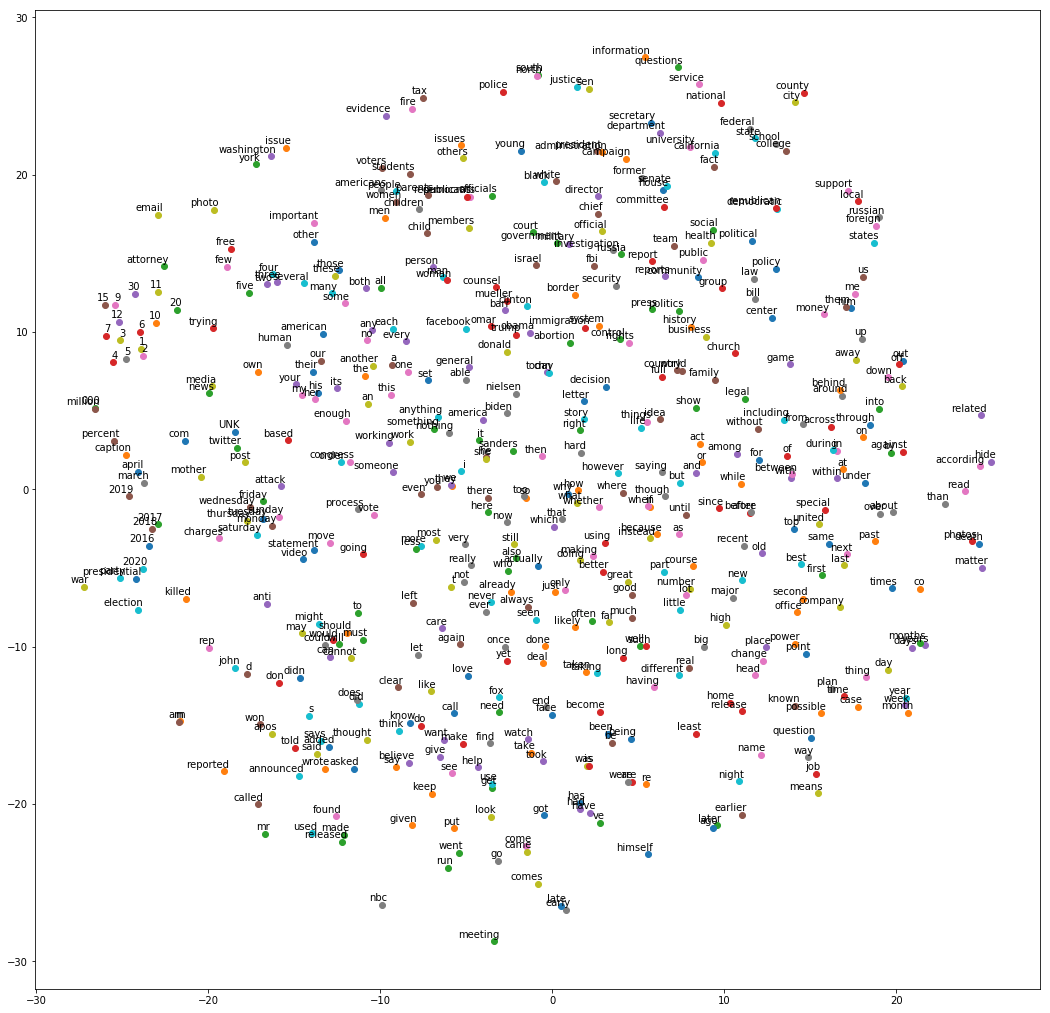

Webhose & Google News - Liberal - Updated 5_10


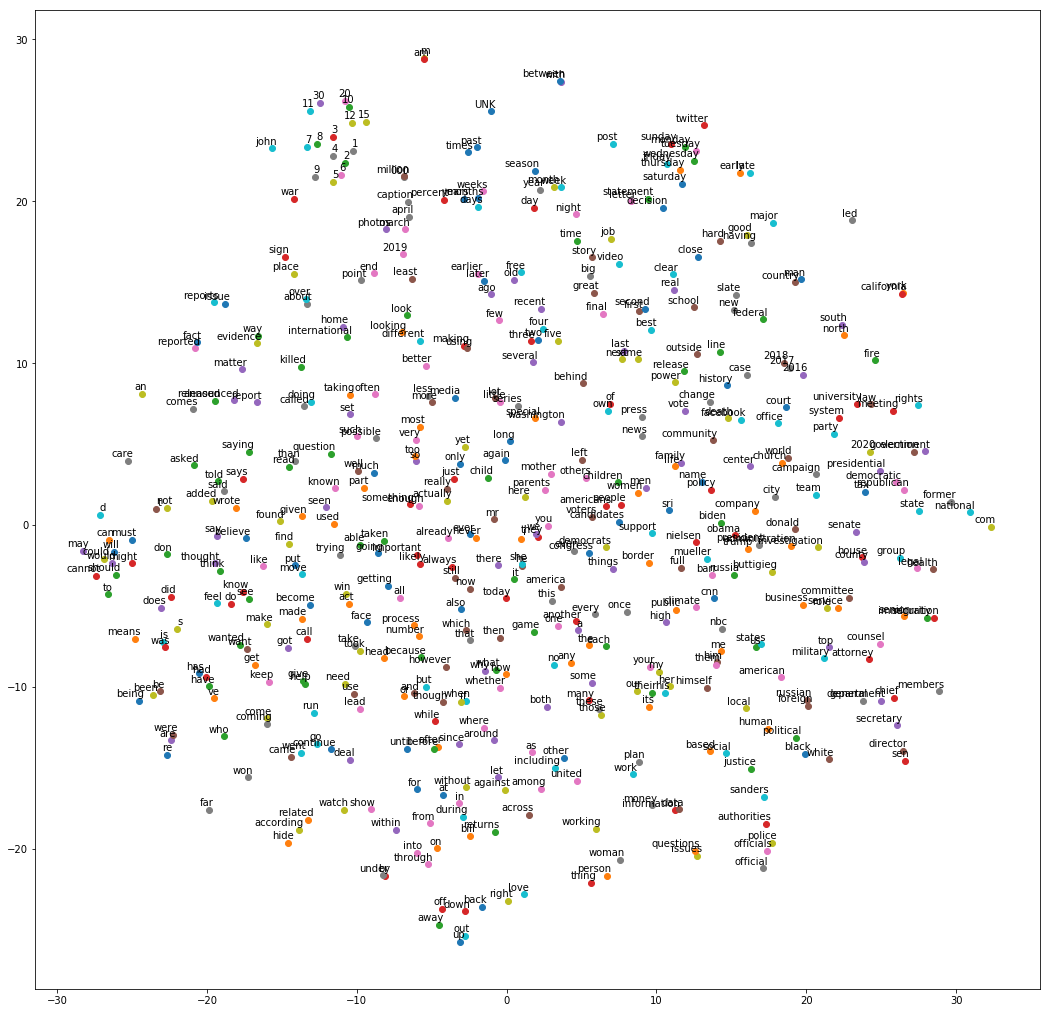

Webhose & Google News - Conservative - Updated 5_10


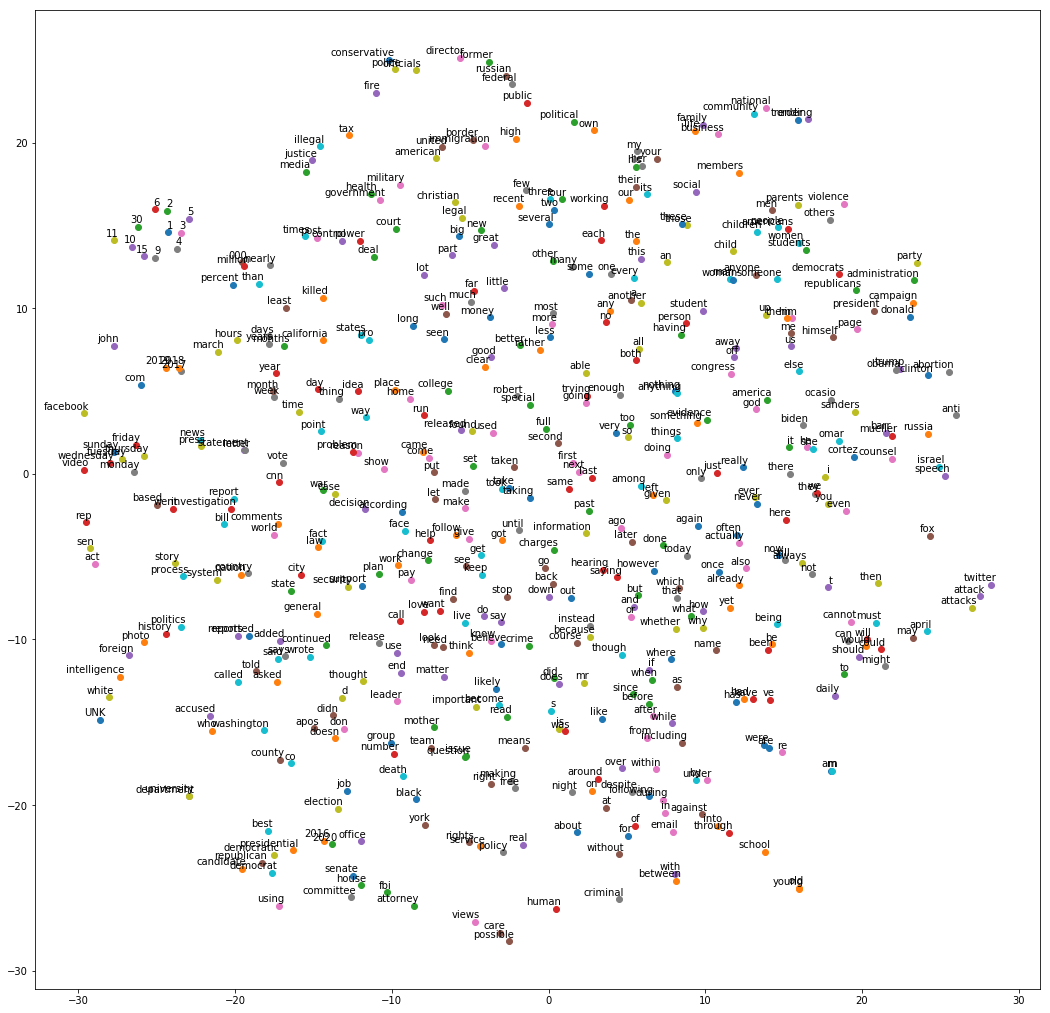

All News - Both Sides


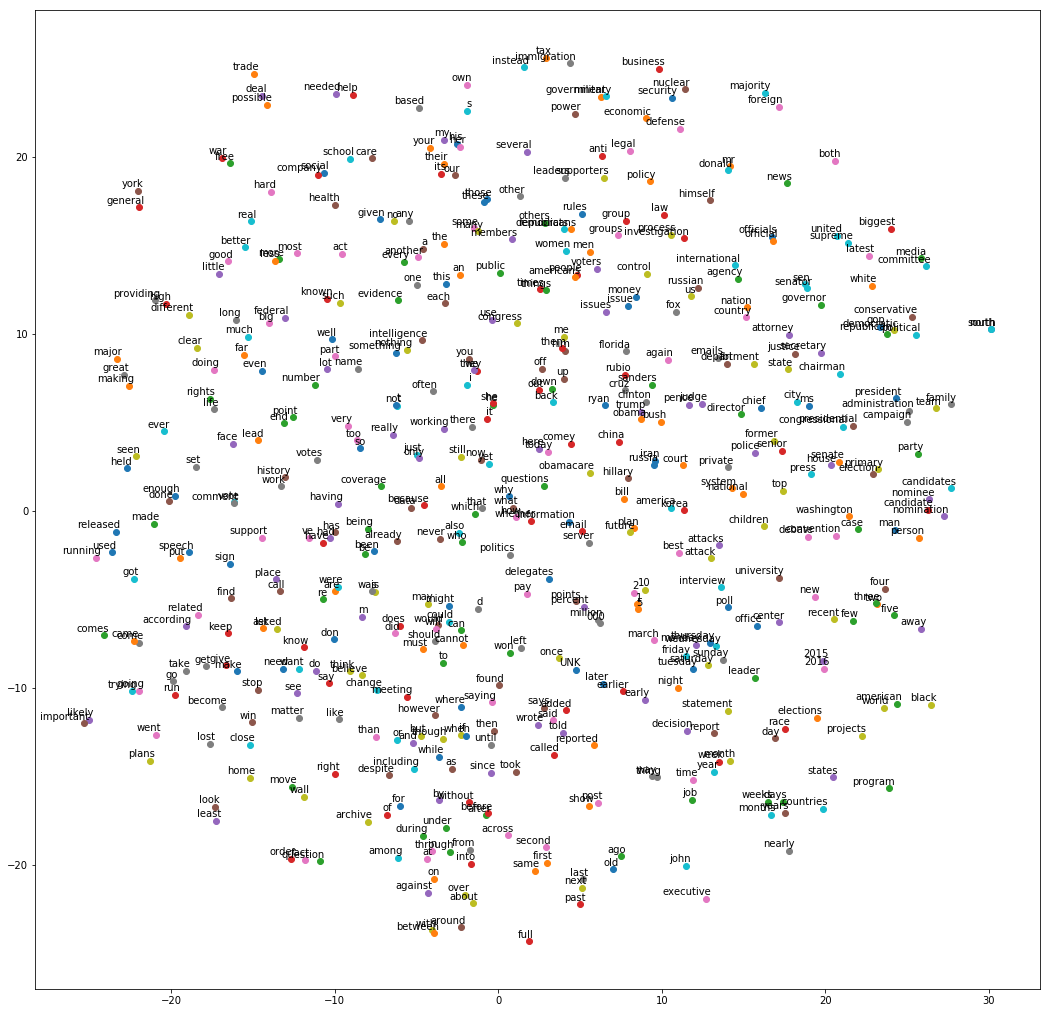

All News - Liberal


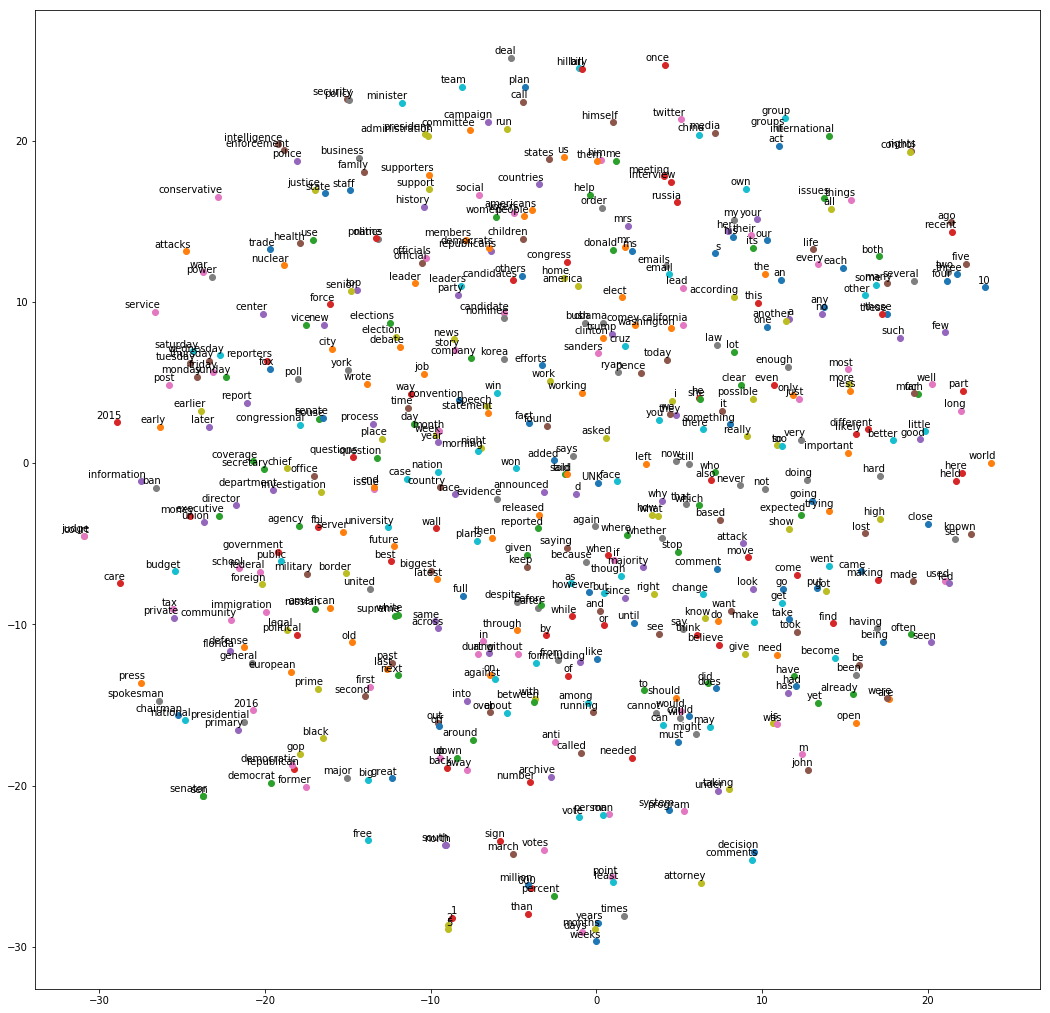

All News - Conservative


TypeError: 'int' object is not subscriptable

In [8]:
for selected_model in [1, 2, 3, 4, 5, 6]:
    base_name = models[selected_model]["base_name"]
    print(models[selected_model]["name"])
    embeds, labels = load_and_reduce_dim(base_name, 500)
    plot_name = "{}{}_tsne.png".format(OUTPUT_FOLDER, base_name)
    plot_with_labels(embeds, labels, plot_name)